<font color="#CC3D3D"><p>
# Evaluation Metrics: Measuring Model Performance

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Imbalanced Data

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9  # 숫자 9를 posive class로 설정하여 불균형 데이터 생성

In [3]:
# y가 ture(숫자 9)인 비율
(y == True).mean()

0.1001669449081803

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

### Training Models ###

***Dummy***

In [5]:
# Class label 중에 무조건 다수인 것으로 예측
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

***Decision Tree***   

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

***Logistic Regrssion***

In [7]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.0001).fit(X_train, y_train)
pred_logit = logit.predict(X_test)

### Accuracy ###

In [8]:
from sklearn.metrics import accuracy_score

print("dummy:", accuracy_score(y_test, pred_dummy))
print("tree:", accuracy_score(y_test, pred_tree))
print("logit:", accuracy_score(y_test, pred_logit))

dummy: 0.8955555555555555
tree: 0.9311111111111111
logit: 0.9133333333333333


<font color='green'><p>
###  Confusion Matrix ###
<br>
<img align="left" src="http://drive.google.com/uc?export=view&id=1wIJIJENLCnfoesuTUMDjywPLMJnat36E" width=700 height=500>

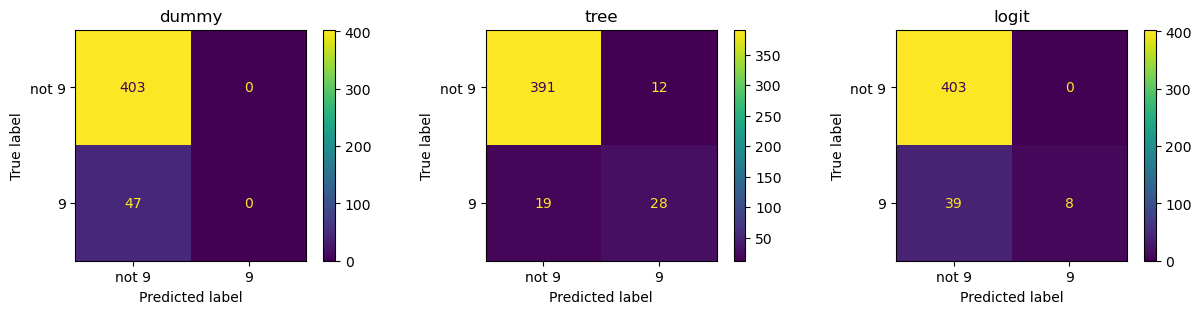

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 3개의 서브차트로 도식
fig, ax = plt.subplots(1, 3, figsize=(15,3))

# 첫번째 서브차트: dummy
ConfusionMatrixDisplay.from_estimator(dummy, X_test, y_test, display_labels=["not 9", "9"], ax=ax[0])
# 두번째 서브차트: tree
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=["not 9", "9"], ax=ax[1])
# 세번째 서브차트: logit
ConfusionMatrixDisplay.from_estimator(logit, X_test, y_test, display_labels=["not 9", "9"], ax=ax[2])

ax[0].set_title('dummy')
ax[1].set_title('tree')
ax[2].set_title('logit')
plt.show()

### Recall, Precision & F1 ###

In [10]:
from sklearn.metrics import classification_report

print("dummy:")
print(classification_report(y_test, pred_dummy, target_names=["not 9", "9"], zero_division=0))
print("\ntree:")
print(classification_report(y_test, pred_tree, target_names=["not 9", "9"], zero_division=0))
print("\nlogit:")
print(classification_report(y_test, pred_logit, target_names=["not 9", "9"], zero_division=0))

dummy:
              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


tree:
              precision    recall  f1-score   support

       not 9       0.95      0.97      0.96       403
           9       0.70      0.60      0.64        47

    accuracy                           0.93       450
   macro avg       0.83      0.78      0.80       450
weighted avg       0.93      0.93      0.93       450


logit:
              precision    recall  f1-score   support

       not 9       0.91      1.00      0.95       403
           9       1.00      0.17      0.29        47

    accuracy                           0.91       450
   macro avg       0.96      0.59      0.62       450
weighted avg       0.92      0.91      0.88       45

##### PR curve

In [11]:
from sklearn.metrics import average_precision_score

# AP(Average Precision)
print('dummy: ', average_precision_score(y_test, dummy.predict_proba(X_test)[:,1]))
print('tree: ', average_precision_score(y_test, tree.predict_proba(X_test)[:,1]))
print('logit: ', average_precision_score(y_test, logit.predict_proba(X_test)[:,1]))

dummy:  0.10444444444444445
tree:  0.6003999947173272
logit:  0.8946824790573934


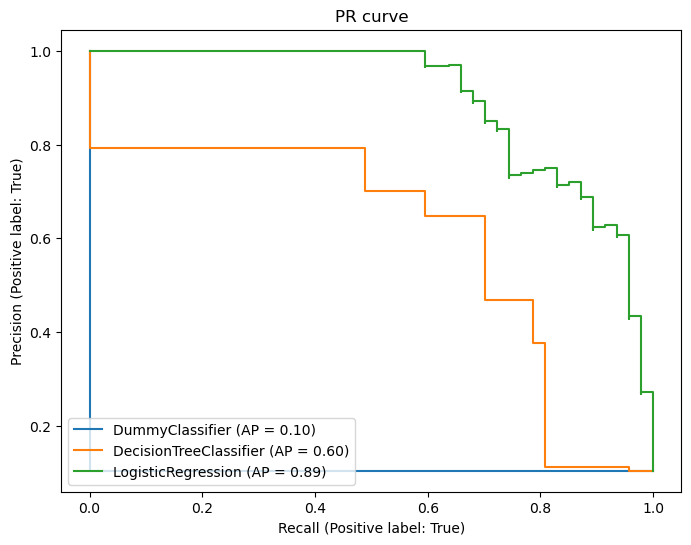

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(1, 1, figsize=(8,6))

PrecisionRecallDisplay.from_estimator(dummy, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(logit, X_test, y_test, ax=ax)

ax.set_title('PR curve')
plt.show()

##### PR by threshold

In [13]:
def plot_precision_recall_by_threshold(precisions, recalls, thresholds) :
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    # plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    _, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, end, 0.1),2))    
    # x축, y축 label과 legend, grid, title 설정
    plt.xlabel('Threshold'); #plt.ylabel('Precision & Recall')
    plt.legend(); plt.grid(); plt.title('PR by threshold')
    plt.show()

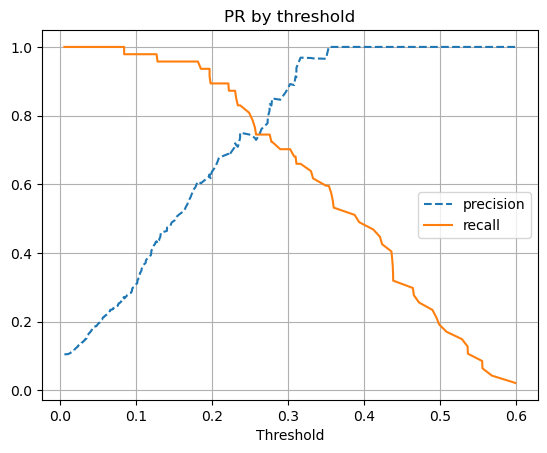

In [14]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, logit.predict_proba(X_test)[:,1])
plot_precision_recall_by_threshold(precisions, recalls, thresholds)

### ROC-AUC 

<img align="left" src="http://drive.google.com/uc?export=view&id=1Htx445FclSqHhhNxPT_uOYQOBiuneWXJ" width=600 height=400>

##### AUC

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_test, dummy.predict_proba(X_test)[:,1])
print('dummy: ', auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
print('tree: ', auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
print('logit: ', auc(fpr, tpr))

dummy:  0.5
tree:  0.862995617971596
logit:  0.9792513594847156


##### ROC curve ####

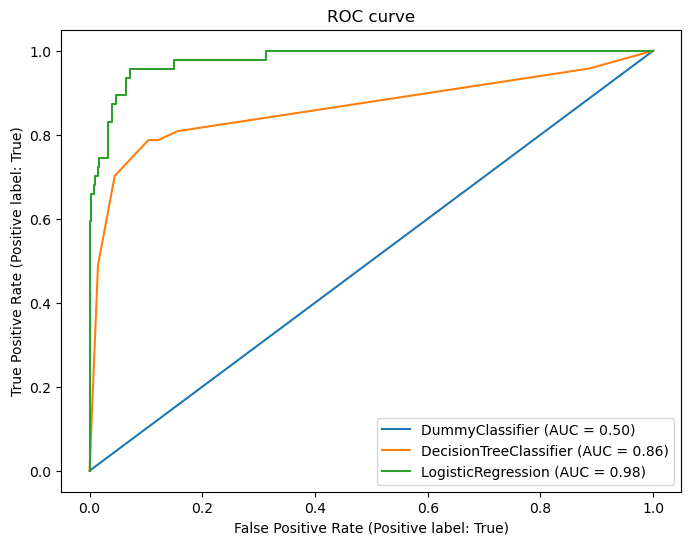

In [16]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(1, 1, figsize=(8,6))

RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=ax)

ax.set_title('ROC curve')
plt.show()

<font color="#CC3D3D"><p>
# End